### DATA 620 Lab: Graph Visualizations

The Twitch users graph dataset found at https://snap.stanford.edu/data/congress-twitter.html provides a file of edgeslists showing Congress's connections on Twitter. The edges are weighted and directed.

In [63]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json

# Perform some data wrangling to make a Gephi usable file
data = pd.read_csv('congress.edgelist', sep = ' ', header = None)
data.head()
data[3] = data[3].str.replace('}', '', regex=False)
data[3] = pd.to_numeric(data[3])
data = data.drop(columns=[2])
display(data.head())

G = nx.from_pandas_edgelist(
    data,
    source=0,
    target=1,
    edge_attr=3,
    create_using=nx.DiGraph()
)

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

,0,1,3
0,0,4,0.002105
1,0,12,0.002105
2,0,18,0.002105
3,0,25,0.004211
4,0,30,0.002105


Number of nodes: 475
Number of edges: 13289


This graph contains 475 nodes and 13289 edges connecting them.

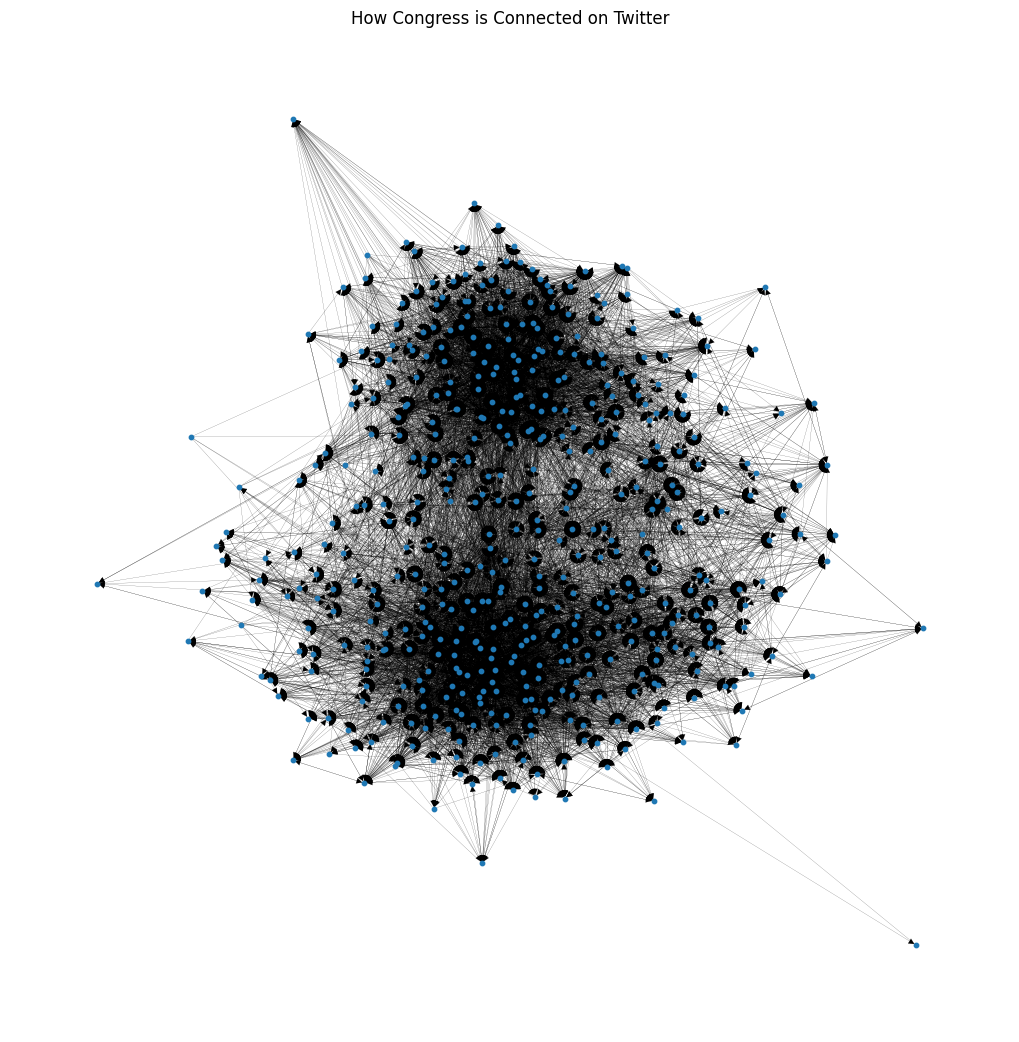

In [66]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed = 123)
nx.draw(G, pos, with_labels=False, node_size=10, width=0.1)
plt.title('How Congress is Connected on Twitter')
plt.show()

This plot is a bit of a sanity check for testing the graph creation process. Our main visual will be on Gephi.

In [47]:
degrees = [degree for node, degree in G.degree()]
avg_degree = sum(degrees) / len(degrees)

print(f'Average degree: {avg_degree:.2f}')
print(f'Density: {nx.density(G):.4f}')
try:
  print(f'Diameter: {nx.diameter(G)}')
except nx.NetworkXError as e:
  print(e)
  largest = max(nx.strongly_connected_components(G), key=len)
  largest_subgraph = G.subgraph(largest)
  print(f'Largest Subgraph Diameter: {nx.diameter(largest_subgraph)}')


Average degree: 55.95
Density: 0.0590
Found infinite path length because the digraph is not strongly connected
Largest Subgraph Diameter: 6


NetworkX provides a function to populate a list of graph node degrees. From this we can determine the average of all of them: 55.95.

Graph density ranges from 0-1 and measures the amount of edges against the maximum possible total. We only have around 5.9% of the possible maximum directed edges `475 * 474 = 225150` in this graph.

The error received is a possible one when an infinite length path is found and the diameter function is unable to complete. One way to resolve this to receive a diameter is by isolating the largest subgraph and getting the diameter of that instead: 6. This should be the largest minimum path within the graph.

In [36]:
pageranks = nx.pagerank(G)

# Sort nodes by PageRank (descending)
sorted_pagerank = sorted(pageranks.items(), key=lambda item: item[1], reverse=True)

print('Top 10 nodes by PageRank score:')
for node, score in sorted_pagerank[:10]:
    print(f'Node {node}: {score:.4f}')

Top 10 nodes by PageRank score:
Node 322: 0.0093
Node 208: 0.0092
Node 190: 0.0088
Node 385: 0.0084
Node 192: 0.0084
Node 254: 0.0082
Node 269: 0.0075
Node 147: 0.0075
Node 303: 0.0074
Node 111: 0.0071


The PageRank scores are relatively low as the connections in the graph are very widespread across Congress. Even Node 322, the highest scoring node, has an extremely low 0.0093 score which implies that the graph is distributed and not very centralized.

In [49]:
nx.write_gexf(G, 'twitch_congress.gexf')

Save the graph in a format that Gephi can use for more visualizations.

In [61]:

with open('congress_network_data.json') as f:
    names_data = json.load(f)
names = names_data[0]['usernameList']
congress_names_df = pd.DataFrame({'name': names})
congress_names_df.to_csv('congress_names.csv', index_label='id')
